In [22]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [23]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def mean(data,a):
    print('平均值',data[a].mean())
    print('方差',data[a].std())

def box_polt(a):
    zhongwei = a.median()
    mean = a.mean()
    q1 = a.quantile(0.25)
    q2 = a.quantile(0.5)
    q3 = a.quantile(0.75)
    q4 = a.quantile(1)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    print('--------------')
    print('中位:',zhongwei)
    print('平均:',mean)    
    print('--------------')
    print('50% :',q2)
    print('75% :',q3)
    print('100%:',upper)
    print('max :',q4)
    print('--------------')
    list_ = []
    list_.append(q2)
    list_.append(q3)
    list_.append(upper)
    return list_

def data_order(a,b):
#     lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Ddata.csv'
#     code = 'gbk'
    data = improt_data(lujing,code)
    if b == 0:
        df_hsh_max = data[data['入店人数'] > a]
        k = df_hsh_max
        return k
    elif a == 0:
        df_hsh_min = data[data['入店人数'] < b  ]
        k = df_hsh_min
        return k
    else:
        df_hsh_ = data[(data['入店人数'] >a) & (data['入店人数'] < b) ]
        k = df_hsh_
        return k 
    
def linear(x,y):
    from sklearn import metrics
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    print('数据分集查看')
    print ('X训练',X_train.shape)
    print ('y训练',y_train.shape)
    print ('X测试',X_test.shape)
    print ('y测试',y_test.shape)
    print('-------------')
    linear =  linear_model.LinearRegression()
    linear.fit(X_train,y_train)
    print('线性结截距:', linear.intercept_)
    print ('回归系数',linear.coef_)
    y_pred = linear.predict(X_test)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def line_bg_rd(x1,y1):   
    x = x1
    y = y1
    data_min = data_order(x,y)
    baoguang = data_min['入店人数'].values.reshape(-1,1)
    jindian = data_min['下单人数'].values.reshape(-1, 1)
    linear(baoguang,jindian)

def drop(data):
    a = data
    a.drop_duplicates(subset='商家ID',inplace = True,keep = 'last')
    print(a['商家ID'].count())


def cluster_look(data,list__):
    list_ = list__
    x = 0
    s = ['max','one','two','min']
    for i in list_:
        df = data[data['cluster'] == i]
        print( s[x] +'-分类:' + str(df['cluster'].count()))    
        x = x+1


In [24]:
lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚月季度数据/6月份数据/2data/Mdata_kmeans.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [25]:
data

,Unnamed: 0,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,推单数,有效订单数,下单新客人数,入店转化率,下单转化率,原价交易额,实付交易额,商家补贴金额,复购人数,新客转化率,复购率,原价客单价,实付客单价,有效率,cluster
0,1,20200601,20200630,9024278,友新意鲜花坊,鲜花组,陕西省,西安,否,20200508,在线,18,18.0,18362,314,23,23,22,21,1.71,0.07,4962,2596,2431,2,0.913043,0.086957,215.73913,112.869565,0.956522,1
1,7,20200601,20200630,9043317,花坞,鲜花组,福建省,福州,否,20200508,在线,18,18.0,11259,435,8,7,7,7,3.86,0.02,2702,1443,1279,1,0.875000,0.125000,337.75000,180.375000,1.000000,1
2,3,20200601,20200630,9043308,时初花艺,鲜花组,陕西省,咸阳,否,20200508,在线,18,18.0,4894,66,1,1,0,0,1.35,0.02,0,0,0,1,0.000000,1.000000,0.00000,0.000000,0.000000,3
3,60,20200601,20200630,9323842,花无缺鲜花店,鲜花组,内蒙古自治区,锡林郭勒盟,否,20200617,在线,12,11.6,4806,129,10,11,7,7,2.68,0.08,1553,671,902,3,0.700000,0.300000,155.30000,67.100000,0.636364,3
4,62,20200601,20200630,9338708,恒海鲜花,鲜花组,山东省,滨州,否,20200617,在线,12,12.8,4146,83,2,2,1,1,2.00,0.02,129,66,68,1,0.500000,0.500000,64.50000,33.000000,0.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,102,20200601,20200630,9415494,九月花艺,鲜花组,山东省,青岛,是,20200630,在线,7,7.0,30,2,1,1,1,1,6.67,0.50,230,69,166,0,1.000000,0.000000,230.00000,69.000000,1.000000,2
115,118,20200601,20200630,9427935,花满庭花艺,鲜花组,福建省,莆田,是,20200630,在线,0,0.0,27,1,0,0,0,0,3.70,0.00,0,0,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,2
116,32,20200601,20200630,9268590,甜蜜花坊,鲜花组,山西省,大同,否,20200618,下线,11,10.3,21,1,0,0,0,0,4.76,0.00,0,0,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,2
117,103,20200601,20200630,9415495,芳雅花艺生活馆,鲜花组,陕西省,渭南,是,20200630,在线,2,0.0,6,0,0,0,0,0,0.00,0.00,0,0,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,2


In [26]:
# data.describe()

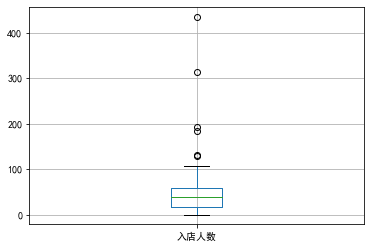

In [27]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 
data.boxplot('入店人数')

In [28]:
a = data['入店人数']
list_ = box_polt(a)
q1 = list_[0]
q2 = list_[1]
q3 = list_[2]
q04 =  0
print(q1)
print(q2)
print(q3)

--------------
中位: 38.0
平均: 46.705882352941174
--------------
50% : 38.0
75% : 59.0
100%: 123.5
max : 435.0
--------------
38.0
59.0
123.5


In [29]:
print('min：')
line_bg_rd(q04,q1)
print('#####################')
print('two：')
line_bg_rd(q1,q2)
print('#####################')
print('one：')
line_bg_rd(q2,q3)
print('#####################')
print('max：')
line_bg_rd(q3,q04)

min：
数据分集查看
X训练 (43, 1)
y训练 (43, 1)
X测试 (15, 1)
y测试 (15, 1)
-------------
线性结截距: [0.25499976]
回归系数 [[0.02018122]]
RMSE: 1.714499011832187
#####################
two：
数据分集查看
X训练 (21, 1)
y训练 (21, 1)
X测试 (7, 1)
y测试 (7, 1)
-------------
线性结截距: [-3.01002963]
回归系数 [[0.10941418]]
RMSE: 1.7993388387864726
#####################
one：
数据分集查看
X训练 (18, 1)
y训练 (18, 1)
X测试 (6, 1)
y测试 (6, 1)
-------------
线性结截距: [7.17632552]
回归系数 [[-0.0494099]]
RMSE: 3.3861610830977953
#####################
max：
数据分集查看
X训练 (4, 1)
y训练 (4, 1)
X测试 (2, 1)
y测试 (2, 1)
-------------
线性结截距: [12.95927477]
回归系数 [[0.03186711]]
RMSE: 14.216794459659901


In [30]:
data_max = data_order(q3,q04)
data_one = data_order(q2,q3)
data_two = data_order(q1,q2)
data_min = data_order(q04,q1)

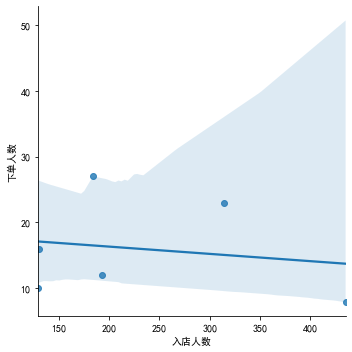

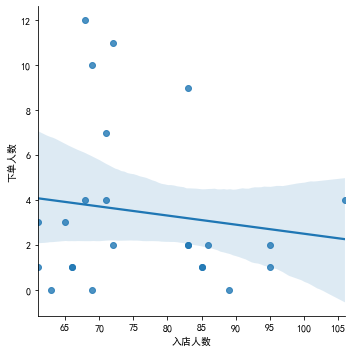

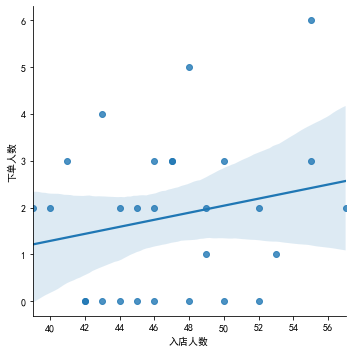

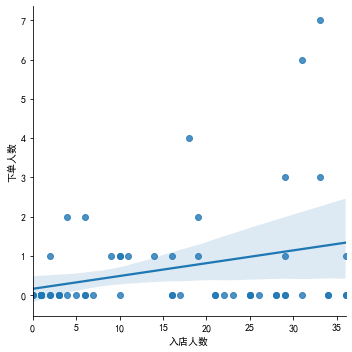

In [31]:
sns.lmplot(x="入店人数", y="下单人数",data=data_max,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_one,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_two,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_min,fit_reg=True)

In [32]:
drop(data_max)
drop(data_one)
drop(data_two)
drop(data_min)

6
24
28
58


In [15]:
drop(data_max)

6


In [35]:
list_t = [1,3,0,2]
cluster_look(data_max,list_t)
print('-------------')
cluster_look(data_one,list_t)
print('-------------')
cluster_look(data_two,list_t)
print('-------------')
cluster_look(data_min,list_t)

max-分类:2
one-分类:3
two-分类:1
min-分类:0
-------------
max-分类:0
one-分类:8
two-分类:15
min-分类:1
-------------
max-分类:0
one-分类:3
two-分类:24
min-分类:1
-------------
max-分类:0
one-分类:0
two-分类:18
min-分类:40


In [34]:

mean(data_max,'下单转化率')
print('-------------------')
mean(data_one,'下单转化率')
print('--------------------')
mean(data_two,'下单转化率')
print('--------------------')
mean(data_min,'下单转化率')

平均值 0.08333333333333333
方差 0.04589843860815601
-------------------
平均值 0.04750000000000001
方差 0.05118168830149416
--------------------
平均值 0.03785714285714286
方差 0.03303837755602401
--------------------
平均值 0.049827586206896556
方差 0.10895824694132852
